In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

pd.options.display.max_columns = 50
pd.options.display.max_colwidth = 300

## Predicting "Greenness" Of Content

This dataset comes from [stumbleupon](https://www.stumbleupon.com/), a web page recommender and was made available [here](https://www.kaggle.com/c/stumbleupon/download/train.tsv)

A description of the columns is below

FieldName|Type|Description
---------|----|-----------
url|string|Url of the webpage to be classified
urlid|integer| StumbleUpon's unique identifier for each url
boilerplate|json|Boilerplate text
alchemy_category|string|Alchemy category (per the publicly available Alchemy API found at www.alchemyapi.com)
alchemy_category_score|double|Alchemy category score (per the publicly available Alchemy API found at www.alchemyapi.com)
avglinksize| double|Average number of words in each link
commonLinkRatio_1|double|# of links sharing at least 1 word with 1 other links / # of links
commonLinkRatio_2|double|# of links sharing at least 1 word with 2 other links / # of links
commonLinkRatio_3|double|# of links sharing at least 1 word with 3 other links / # of links
commonLinkRatio_4|double|# of links sharing at least 1 word with 4 other links / # of links
compression_ratio|double|Compression achieved on this page via gzip (measure of redundancy)
embed_ratio|double|Count of number of <embed> usage
frameBased|integer (0 or 1)|A page is frame-based (1) if it has no body markup but have a frameset markup
frameTagRatio|double|Ratio of iframe markups over total number of markups
hasDomainLink|integer (0 or 1)|True (1) if it contains an <a> with an url with domain
html_ratio|double|Ratio of tags vs text in the page
image_ratio|double|Ratio of <img> tags vs text in the page
is_news|integer (0 or 1) | True (1) if StumbleUpon's news classifier determines that this webpage is news
lengthyLinkDomain| integer (0 or 1)|True (1) if at least 3 <a> 's text contains more than 30 alphanumeric characters
linkwordscore|double|Percentage of words on the page that are in hyperlink's text
news_front_page| integer (0 or 1)|True (1) if StumbleUpon's news classifier determines that this webpage is front-page news
non_markup_alphanum_characters|integer| Page's text's number of alphanumeric characters
numberOfLinks|integer Number of <a>|markups
numwords_in_url| double|Number of words in url
parametrizedLinkRatio|double|A link is parametrized if it's url contains parameters or has an attached onClick event
spelling_errors_ratio|double|Ratio of words not found in wiki (considered to be a spelling mistake)
label|integer (0 or 1)|User-determined label. Either evergreen (1) or non-evergreen (0); available for train.tsv only

### What are 'evergreen' sites?
- These are websites that always relevant like recipies or reviews (as opposed to current events)
- Look at some examples

In [2]:
data = pd.read_csv('../../DSI-CHI-1/lessons/week-04/3.4-model-fit-and-sklearn-logistic/assets/datasets/train.tsv', sep='\t', na_values='?')

# Extract the title and body from the boilerplate JSON text
data['title'] = data.boilerplate.map(lambda x: json.loads(x).get('title', ''))
data['body'] = data.boilerplate.map(lambda x: json.loads(x).get('body', ''))

In [3]:
data[['title', 'label']].head()

,title,label
0,"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries",0
1,"The Fully Electronic Futuristic Starting Gun That Eliminates Advantages in Races the fully electronic, futuristic starting gun that eliminates advantages in races the fully electronic, futuristic starting gun that eliminates advantages in races",1
2,Fruits that Fight the Flu fruits that fight the flu | cold & flu | men's health,1
3,10 Foolproof Tips for Better Sleep,1
4,The 50 Coolest Jerseys You Didn t Know Existed coolest jerseys you haven't seen,0


#### Build a feature matrix where X contains useful features and y contains the target variable `label`

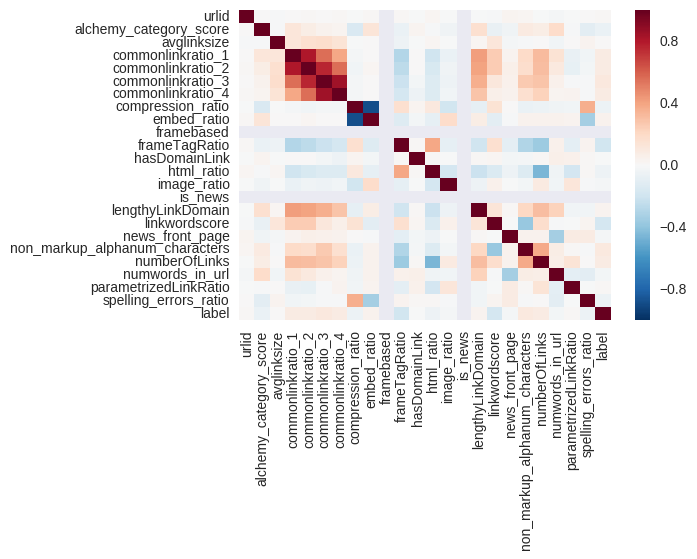

In [4]:
sns.heatmap(data.corr())

In [5]:
num_columns = data.corr()[-1:].columns

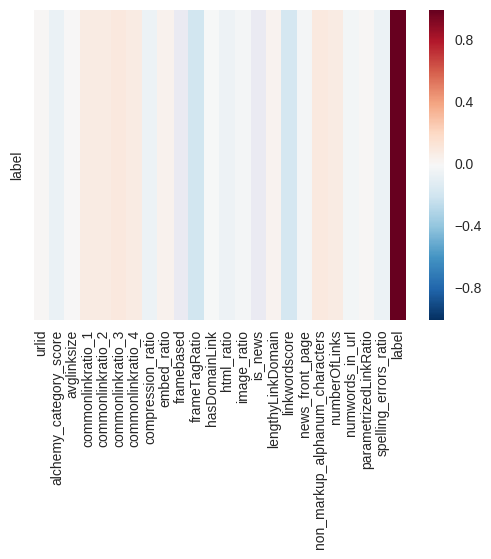

In [6]:
sns.heatmap(data.corr()[-1:])

In [35]:
from sklearn.cross_validation import train_test_split

data_no_na = data.dropna()

# y = data_no_na['label']
# x = data_no_na[['commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4', 
#          'non_markup_alphanum_characters', 'numberOfLinks']]
# x = data_no_na[num_columns]
# x = x.drop('label', axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(data_no_na[num_columns].drop('label', axis=1), data_no_na['label'], 
                                                    test_size=0.33)


In [36]:
X_test.isnull().any()

urlid                             False
alchemy_category_score            False
avglinksize                       False
commonlinkratio_1                 False
commonlinkratio_2                 False
commonlinkratio_3                 False
commonlinkratio_4                 False
compression_ratio                 False
embed_ratio                       False
framebased                        False
frameTagRatio                     False
hasDomainLink                     False
html_ratio                        False
image_ratio                       False
is_news                           False
lengthyLinkDomain                 False
linkwordscore                     False
news_front_page                   False
non_markup_alphanum_characters    False
numberOfLinks                     False
numwords_in_url                   False
parametrizedLinkRatio             False
spelling_errors_ratio             False
dtype: bool

In [37]:
X_train.head()

,urlid,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio
5435,3222,0.561609,3.115702,0.675182,0.354015,0.197080,0.131387,0.479335,0.0,0,0.098196,0,0.194767,0.049100,1.0,1,40,0.0,5988,274,9,0.375912,0.075783
1607,7965,0.647761,1.980392,0.398058,0.174757,0.009709,0.009709,0.469097,0.0,0,0.051919,0,0.225264,0.018041,1.0,1,19,1.0,4198,103,0,0.019417,0.117318
5424,3798,0.600820,2.385965,0.573427,0.279720,0.237762,0.216783,0.492196,0.0,0,0.040639,0,0.236980,0.086316,1.0,1,19,0.0,4922,143,5,0.209790,0.082803
2234,8315,0.563208,1.754098,0.457447,0.164894,0.058511,0.000000,0.447552,0.0,0,0.027673,0,0.200469,0.150000,1.0,1,19,0.0,6554,188,6,0.095745,0.070501
6501,7991,0.777347,2.185294,0.763006,0.387283,0.086705,0.026012,0.462130,0.0,0,0.036216,0,0.204866,0.055556,1.0,1,71,0.0,1580,346,13,0.132948,0.076503


In [40]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

model = logit.fit(X_train, Y_train)
Y_predictions = model.predict(X_test)

print 'Score: ', model.score(X_train, Y_train)

Score:  0.623469818489


In [41]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_predictions)
print(acc)

0.625856164384


In [52]:
from sklearn.metrics import confusion_matrix
import numpy as np

conmat = np.array(confusion_matrix(Y_test, Y_predictions))

confusion = pd.DataFrame(conmat, index=['is_evergreen', 'not_evergreen'],
                         columns=['predicted_evergreen','predicted_not_evergreen'])

confusion

,predicted_evergreen,predicted_not_evergreen
is_evergreen,267,304
not_evergreen,133,464


In [53]:
TP = confusion.ix['is_evergreen', 'predicted_evergreen']
FP = confusion.ix['not_evergreen', 'predicted_evergreen']
TN = confusion.ix['not_evergreen', 'predicted_not_evergreen']
FN = confusion.ix['is_evergreen', 'predicted_not_evergreen']

zip(['True Positives','False Positives','True Negatives','False Negatives'],
          [TP, FP, TN, FN])

[('True Positives', 267),
 ('False Positives', 133),
 ('True Negatives', 464),
 ('False Negatives', 304)]

In [49]:
print((TP + TN) / float(len(Y_test)))

0.625856164384


In [51]:
from sklearn.metrics import classification_report

cls_rep = classification_report(Y_test, Y_predictions)
print(cls_rep)

             precision    recall  f1-score   support

          0       0.67      0.47      0.55       571
          1       0.60      0.78      0.68       597

avg / total       0.64      0.63      0.62      1168



#### Build a Logistic Regression model using scikit-learn and then!
- Examine the coefficients using the `examine_coefficients` function provided
- Evaluate the AUC, precision and recall of the model using cross-validation
- Plot the ROC curve
- Iterate on the model by adding in additional features in `X` above

In [ ]:
def examine_coefficients(model, df):
    return pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : df.columns}
    ).sort_values(by='Coefficient')

In [ ]:
# TODO